In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Colab Notebooks/Sebastian

/content/drive/MyDrive/Colab Notebooks/Sebastian


Stuff for commiting to Github below

In [ ]:
ROOT = '/content/drive"'

In [ ]:
from os.path import join  

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'drive/MyDrive/Colab Notebooks/Sebastian' 
# replace with your Github username 
GIT_USERNAME = "ahhuang007" 
# definitely replace with your
GIT_TOKEN = "new token"  
# Replace with your github repository in this case we want 
# to clone deep-learning-v2-pytorch repository
GIT_REPOSITORY = "Sebastian" 

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

# It's good to print out the value if you are not sure 
print("PROJECT_PATH: ", PROJECT_PATH)   

# In case we haven't created the folder already; we will create a folder in the project path     

#GIT_PATH = "https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPOSITORY}.git" this return 400 Bad Request for me
#GIT_PATH = "https://" + GIT_TOKEN + "@github.com/" + GIT_USERNAME + "/" + GIT_REPOSITORY + ".git"
#print("GIT_PATH: ", GIT_PATH)

PROJECT_PATH:  /content/drive"/drive/MyDrive/Colab Notebooks/Sebastian


In [22]:
!git add .

In [23]:
!git config --global user.email "ahhuang007@gmail.com"
!git config --global user.name "ahhuang007"

In [24]:
!git commit -m "testing new reward function, swapped roll and yaw in function"

[main b46a60a] testing new reward function, swapped roll and yaw in function
 7 files changed, 501762 insertions(+), 1 deletion(-)
 rewrite colab.ipynb (95%)
 create mode 100644 models/random_model_ppo_v5.zip
 create mode 100644 models/real_model_ppo_v5.zip
 create mode 100644 ppo_rewards_v5.csv


In [25]:
!git remote set-url origin https://$git_key@github.com/ahhuang007/Sebastian.git

Had to reset the remote origin URL here, removed the code since it contained the personal authorization token. Now I set the git key as an environment variable.

--------

Command for pulling from github

In [3]:
!git pull origin

remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 8 (delta 5), reused 8 (delta 5), pack-reused 0
Unpacking objects: 100% (8/8), done.
From https://github.com/ahhuang007/Sebastian
   d0312ab..cd0c87f  main       -> origin/main
Updating d0312ab..cd0c87f
Fast-forward
 .../envs/__pycache__/seb_env.cpython-37.pyc        | Bin 4842 -> 4746 bytes
 viz.py                                             |  40 ++++++++++++---------
 2 files changed, 24 insertions(+), 16 deletions(-)


In [25]:
!git push origin

Counting objects: 15, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (15/15), done.
Writing objects: 100% (15/15), 6.70 MiB | 1.32 MiB/s, done.
Total 15 (delta 5), reused 0 (delta 0)
remote: Resolving deltas: 100% (5/5), completed with 5 local objects.
To https://github.com/ahhuang007/Sebastian.git
   ff5e438..b46a60a  main -> main


Installing stable_baselines since it might be better

In [ ]:
%cd ..

/content/drive/MyDrive/Colab Notebooks


In [4]:
!pip install stable-baselines3[extra]

     |████████████████████████████████| 174 kB 5.3 MB/s 


Installing my custom environment

In [6]:
cd Sebastian

[Errno 2] No such file or directory: 'Sebastian'
/content/drive/My Drive/Colab Notebooks/Sebastian/gym-seb


In [5]:
%cd gym-seb

/content/drive/My Drive/Colab Notebooks/Sebastian/gym-seb


In [6]:
!pip install -e .

Obtaining file:///content/drive/My%20Drive/Colab%20Notebooks/Sebastian/gym-seb
     |████████████████████████████████| 1.5 MB 5.2 MB/s 
     |████████████████████████████████| 90.8 MB 295 bytes/s 
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616826 sha256=fcf4926ff60c7d4c74e7509c76081a618b5a419410d4568749c11b6b7fd3dfa3
  Stored in directory: /root/.cache/pip/wheels/76/ee/9c/36bfe3e079df99acf5ae57f4e3464ff2771b34447d6d2f2148
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3:
      Successfully uninstalled gym-0.17.3
  Running setup.py develop for gym-seb
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 1.3.0 requires gym<0.20,>=0.17, but you have gym 0.21.0 which is incompatible.


Restart runtime here

In [1]:
%cd drive/My Drive/Colab Notebooks/Sebastian

/content/drive/My Drive/Colab Notebooks/Sebastian


In [2]:
from stable_baselines3 import DDPG, PPO
import gym

In [3]:
import gym_seb
env = gym.make('seb-v0', episode_timesteps = 10000, use_gui = False)
env.seed(4)

In [4]:
from stable_baselines3.common.env_checker import check_env

check_env(env, warn=True)

resetting environment


In [5]:
from stable_baselines3.ddpg.policies import MlpPolicy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

In [6]:
'''
model finished running when "doneness" was achievable - do i need to do this?
I think the model will keep learning until it is done - if it is done but 
has not reached the number of total timesteps, it will reset and learn again
until it has surpassed the total_timesteps and is done again
'''

model = PPO('MlpPolicy', env, verbose = 1)
env.action_space.seed(4)
env.observation_space.seed(4)
model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [7]:
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.results_plotter import load_results, ts2xy

class Recorder(BaseCallback):
  '''
  callback for recording data
  '''
  def __init__(self, li, log_dir, verbose = 1):
    super(Recorder, self).__init__(verbose)
    self.li = li
    self.log_dir = log_dir
  
  def _on_step(self) -> bool:
    #x, y = ts2xy(load_results(self.log_dir), 'timesteps')
    self.li.append(self.locals['rewards'][0])


In [8]:
from stable_baselines3.common.evaluation import evaluate_policy

#performance with random model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, deterministic=False)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
robot has flipped over at timestep 118
resetting environment
robot has flipped over at timestep 867
resetting environment
robot has flipped over at timestep 1055
resetting environment
robot has flipped over at timestep 1685
resetting environment
robot has flipped over at timestep 1807
resetting environment
robot has flipped over at timestep 1886
resetting environment
robot has flipped over at timestep 2170
resetting environment
robot has flipped over at timestep 3262
resetting environment
robot has flipped over at timestep 4169
resetting environment
robot has flipped over at timestep 4389
resetting environment
mean_reward=185.34 +/- 150.00995643521398


In [9]:
model.save("models/random_model_ppo_v6")

In [7]:
ppo_model = PPO.load("real_model_ppo_action", env = env)
ppo_model.set_random_seed(4)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [10]:
ppo_model = PPO('MlpPolicy', env, verbose = 1)
ppo_model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [11]:
data = []
record = Recorder(data, log_dir = "/")

In [19]:
env.reset()
#set total_timesteps equal to n_eval_episodes * max_timesteps
#model will go through 2048*x timsteps, where total_timesteps will be rounded up
#to nearest multiple of 2048
#action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

ppo_model = ppo_model.learn(total_timesteps = 100000, log_interval = 10000, callback = record)
ppo_model.save("models/real_model_ppo_v6")

resetting environment
resetting environment
at episode 410000
0.48646769404411316
maximum timestep reached for episode
resetting environment
at episode 420000
0.471825110912323
maximum timestep reached for episode
resetting environment
at episode 430000
0.4836429214477539
maximum timestep reached for episode
resetting environment
robot has flipped over at timestep 436573
resetting environment
at episode 440000
0.4828386044502258
maximum timestep reached for episode
resetting environment
at episode 450000
0.48583266615867615
maximum timestep reached for episode
resetting environment
at episode 460000
0.4938115793466568
robot has flipped over at timestep 460227
resetting environment
at episode 470000
0.4759759259223938
maximum timestep reached for episode
resetting environment
at episode 480000
0.49241374850273134
maximum timestep reached for episode
resetting environment
at episode 490000
0.4901483201980591
maximum timestep reached for episode
resetting environment
at episode 500000
0.4

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy
mean_reward, std_reward = evaluate_policy(ppo_model, env, n_eval_episodes=10, deterministic=False)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
at episode 510000
0.49122274816036227
maximum timestep reached for episode
resetting environment
at episode 520000
0.48457689881324767
maximum timestep reached for episode
resetting environment
at episode 530000
0.4876254951953888
maximum timestep reached for episode
resetting environment
at episode 540000
0.48759637713432313
maximum timestep reached for episode
resetting environment
at episode 550000
0.49524097591638566
maximum timestep reached for episode
resetting environment
at episode 560000
0.49130246341228484
maximum timestep reached for episode
resetting environment
at episode 570000
0.49130071580410006
maximum timestep reached for episode
resetting environment
at episode 580000
0.490450444817543
maximum timestep reached for episode
resetting environment
at episode 590000
0.49142377853393554


Plotting

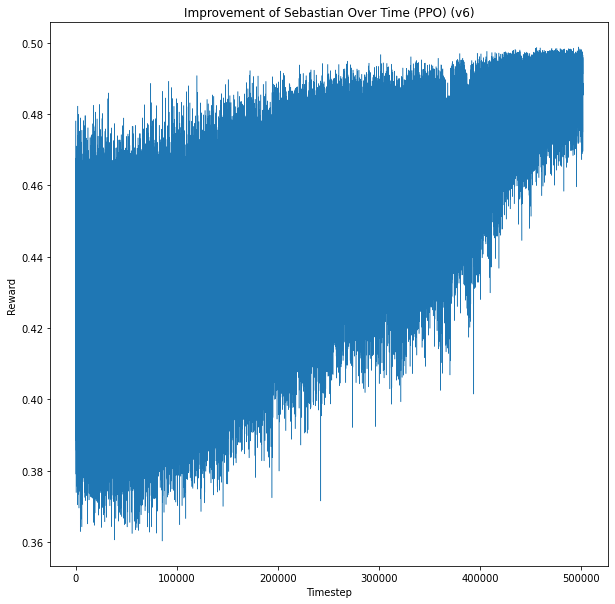

In [20]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"]=(10,10)
xs = range(1, len(data) + 1)
plt.plot(xs, data, linewidth = 0.5)
plt.xlabel("Timestep")
plt.ylabel("Reward")
plt.title("Improvement of Sebastian Over Time (PPO) (v6)")
plt.show()

So, yeah, my algorithm's improving but it still needs to improve a lot more. It would appear that PPO is better than DDPG, so I think I'll be working with PPO from here on out.

In [ ]:
#Testing TD3
from stable_baselines3 import TD3
td3_model = TD3('MlpPolicy', env, verbose = 1)
td3_model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Possible methods of improvement: Expanding observation space to include joint angles/velocities (done), contact forces, rotation matrix, increase reward based on velocity and magnitude of action taken

Some testing we did on TD3 (an upgraded version of DDPG), it takes so long to train that it doesn't seem worth looking into.

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

#performance with random model
mean_reward, std_reward = evaluate_policy(td3_model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
robot has flipped over at timestep 1114318
resetting environment
at episode 1120000
-1.541983962059021
maximum timestep reached for episode
resetting environment
at episode 1130000
-1.4691083431243896
maximum timestep reached for episode
resetting environment
at episode 1140000
-2.7713000774383545
maximum timestep reached for episode
resetting environment
at episode 1150000
-1.830146312713623
maximum timestep reached for episode
resetting environment
at episode 1160000
-1.852158546447754
maximum timestep reached for episode
resetting environment
at episode 1170000
-0.8908807039260864
maximum timestep reached for episode
resetting environment
robot has flipped over at timestep 1174587
resetting environment
robot has flipped over at timestep 1176486
resetting environment
robot has flipped over at timestep 1176766
resetting environment
mean_reward=-11838.14 +/- 8694.458009957501


In [ ]:
td3_model.save("random_model_td3")

In [ ]:
td3_model = TD3.load("real_model_td3", env = env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
class TD3Recorder(BaseCallback):
  '''
  callback for recording data
  '''
  def __init__(self, li, log_dir, verbose = 1):
    super(TD3Recorder, self).__init__(verbose)
    self.li = li
    self.log_dir = log_dir
  
  def _on_step(self) -> bool:
    #x, y = ts2xy(load_results(self.log_dir), 'timesteps')
    self.li.append(self.locals['episode_reward'])


In [ ]:
data2 = []
record = TD3Recorder(data2, log_dir = "/")

In [ ]:
env.reset()
#set total_timesteps equal to n_eval_episodes * max_timesteps
#Setting for loop so we can train in pieces in case colab kicks us off

td3_model = td3_model.learn(total_timesteps = 100000, log_interval = 100, callback = record)
td3_model.save("real_model_td3")

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy
mean_reward, std_reward = evaluate_policy(ddpg_model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

In [20]:
import pandas as pd
df = pd.DataFrame(data = {"timestep":range(1,len(data) + 1), "reward":data})

In [21]:
df.to_csv("ppo_rewards_v5.csv")